In [4]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
import sys
from PIL import Image

In [5]:
# --- image functions ---

# read image as numpy array
def read_image(filename):
    return np.array(Image.open(filename))

# print image
def show_image(image):
    plt.imshow(image)
    plt.show()

# save image
def write_image(image, filename):
    Image.fromarray(image).save(filename)

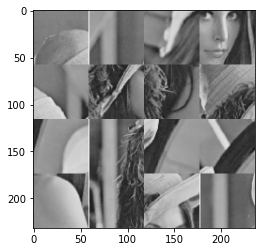

In [7]:
# reading shuffled image
# NOTE: if the image is not already shuffled then it can be done using the utility file 'image_shuffler.py'
image = read_image("shuffled_image.png")
show_image(image)


In [ ]:
# function to find columns
def find_columns(image, threshold = 0.5):
    idx = []
    costs = []

    for i in range(image.shape[1] - 1):
        right = image[:, i + 1 : i + 2, :]
        left = image[:, i : i + 1, :]
        __c = border_cost(left, right)
        costs.append(__c)

    for i, c in enumerate(costs):
        if c > threshold:   # if the cost is greater than the threshold then the column is not a part of the solution
            idx.append(i)

    # plot the costs
    cplot(costs, threshold)

    if len(idx) == 0:
        return 1

    if len(idx) == 1:
        col_width = min(image.shape[1] - idx[0], idx[0])
        result = round(image.shape[1] / col_width)
        return result

    gaps = [idx[i + 1] - idx[i] for i in range(len(idx) - 1)]
    col_width = LCD(gaps)
    result = int(image.shape[1] / col_width)
    return result

# function to find rows
def find_n_rows(image, threshold):
    copy_image = np.copy(image)
    rot_image = np.copy(np.rot90(copy_image))
    return find_columns(rot_image, threshold)

# function to plot the costs
def cplot(costs, threshold):
    fig = plt.figure(figsize=(5, 4), dpi=80, facecolor='w', edgecolor='k')
    plt.axhline(y=threshold)
    plt.scatter(list(range(len(costs))), costs)
    plt.grid()
    plt.savefig("costs.png")


# function to find the least common divisor
def LCD(l):
    mini = min(l)
    assert mini > 0
    for i in range(mini, 0, -1):
        rests = [e % i for e in l]
        if not any(rests):
            return i

# function to calculate the left right border cost
def border_cost(l, r):
    l = l[:, -1, :].astype(np.int16)
    r = r[:, 0, :].astype(np.int16)
    # diff = np.absolute(np.subtract(l, r))
    # return np.sum(diff)
    return np.sum(np.abs(l - r))

# function to find the first piece of the puzzle from cost matrix
def fp_finder(cost_mat_left_right, cost_mat_up_down):
    score1 = np.min(cost_mat_left_right, axis=0)
    score2 = np.min(cost_mat_up_down, axis=0)